$\newcommand{\re}{\mathbb{R}}$
# Stability of Gaussian elimination

In [22]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

## Gaussian elimination with partial pivoting

The rows are swapped in the pivoting step and the decomposition is of the form

$$
P A = L U
$$

where $P$ is a permutation matrix. In the code, we store a permuation vector rather than a matrix.

In [3]:
def PLU(A):
    m = A.shape[0]
    U = A.copy()
    L = np.eye(m)
    P = np.arange(m,dtype=int) # Permutation matrix
    for k in range(m-1):
        i = np.argmax(np.abs(U[k:m,k])) + k
        U[[k,i],k:m] = U[[i,k],k:m] # swap row i and k
        L[[k,i],0:k] = L[[i,k],0:k] # swap row i and k
        P[[k,i]] = P[[i,k]]         # swap row i and k
        for j in range(k+1,m):
            L[j,k] = U[j,k] / U[k,k]
            U[j,k:m] = U[j,k:m] - L[j,k] * U[k,k:m]
    return np.abs(U).max() / np.abs(A).max()

Now we test on many random matrices. **NOTE**: This can take some time to run.

In [16]:
sizes = range(100,1000,10)
nsamples = 100
mvalues, rhovalues = [], []

for m in sizes:
    for r in range(nsamples):
        A = np.random.normal(0.0, np.sqrt(1.0/m), (m,m))
        rho = PLU(A)
        rhovalues.append(rho)
        mvalues.append(m)

Plot growth factor vs matrix size $m$.

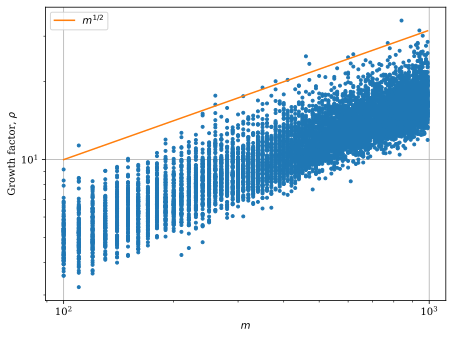

In [23]:
plt.loglog(mvalues, rhovalues, '.')
plt.loglog(mvalues, np.sqrt(mvalues), label='$m^{1/2}$')
plt.xlabel('$m$')
plt.ylabel('Growth factor, $\\rho$')
plt.legend()
plt.grid(True)